# Energy Requirements of Glass Manufacturing

This journal creates a baseline for the energy required to manufacture glass for PV applications. The processes covered here include batch prep, melting, forming, and post forming (ex: annealing). Most glass facilities are vertically integrated; once the silica and other raw materials arrive, they are mixed into proportional batches, melted, formed, and any post forming processes applied. Therefore, we will calcualte this as a single energy step, with transportation of the silica and the finished glass cut to size before and after this energy demand.

While most PV glass is rolled glass, some is float. In the literature it is hard to distinguish the energy needs and processing of float versus rolled, so here one is used interchangeably for the other. 



In [37]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10, 6)

## Batch Prep

Batch preparation for glass typically involves the mixing of the constituant materials for the glass, including high quality silica and additives such as Al2O3, CaO, MgO, Na2O. This can involve crushers and mixers and conveyer belts. 

In [29]:
cwd = os.getcwd() #grabs current working directory
#skipcols = ['Source', 'Notes','Country']
e_batchglass_raw = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/energy-input-batchglass.csv",
                                     index_col='year')#, usecols=lambda x: x not in skipcols)

In [30]:
e_batchglass_raw.dropna(how='all')

,E_batchingGlass_kWhpkg,Source,Notes,Country
year,,,,
1980,0.012433,"H. L. Brown, Energy Analysis of 108 Industrial...",1.32 lbs of mixed batch,USA
2001,0.088185,"C. Galitsky, E. Worrell, C. Galitsky, E. Masan...","From US DOE 2002a, batch prep = conveyors, cru...",USA
2002,0.200000,"J. L. Pellegrino, “Energy and Environmental Pr...","pg 27, ""avg specific energy use"" 3412 BTU/kWh ...",USA
2009,0.003000,"P. W. Griffin, G. P. Hammond, and R. C. McKenn...","""batch input"", assumes 50% cullet, majority co...",UK
2019,0.010000,"M. Zier, P. Stenzel, L. Kotzur, and D. Stolten...","2019 German data, elec",Germany


Text(0, 0.5, '[kWh/kg]')

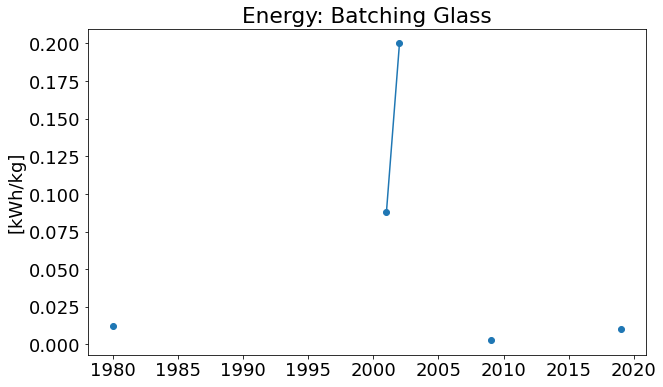

In [48]:
plt.plot(e_batchglass_raw.index,e_batchglass_raw.iloc[:,0], marker='o')
plt.title('Energy: Batching Glass')
plt.ylabel('[kWh/kg]')

The early 2000s data seems significantly higher than the other points. Both are trusted DOE sources. The UK data point assumes 50% cullet, which we know to be high for float/rolled glass, but in mixing, is seems like this wouldn't cause a significant difference in energy demand. Also, the UK value includes contributions from ethane/methane, implying a heating or drying energy demand not represented by the others.

Overall, all values are quite low on a kWh/kg basis, and the processing tools for this step have not changed significantly in the studied time frame. Therefore, we will average all values together for our baseline.

In [51]:
avg_batch_e = e_batchglass_raw.iloc[:,0].mean()
print('The average batching energy for glass making is '+str(round(avg_batch_e,3)) + ' kWh/kg.')

The average batching energy for glass making is 0.063 kWh/kg.


## Melting

The next step in glass manufacturing is the melting of the glass. This is seperated out in the literature from the forming, although the process is usually continuous. This step also involves a significant quantity of methane gas heating. 

In [ ]:
#there are two ways to account for fossil energy: 
#1) seperate column/file
#2) total energy and a column designating the fraction of total energy due to methane/fossil fuels
#